<a href="https://colab.research.google.com/github/engineerjkk/Image-Similarity/blob/main/Image_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

우선 필요한 라이브러리들을 다운로드 받습니다.  
그리고 이번 실습에서 사용할 데이터셋인 MNIST 데이터셋 또한 함께 다운로드를 받습니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
MNIST=fetch_openml('mnist_784',version=1)

MNIST의 key값을 불러와 확인해보면 실습에서 사용할것은 data와 target이 되겠습니다.

In [ ]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

데이터의 개수 7만개와 각 이미지에 들어있는 784개의 픽셀들을 나타내고 있습니다. 

In [ ]:
MNIST['data']

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


28 x 28 크기의 숫자이미지가 벡터화되어서 저장이 됐다라고 보시면 되겠습니다. 

In [ ]:
np.sqrt(784)

28.0

행은 7만개가있고 그 행에 들어있는 클래스가 있습니다. 이 값들이 0~9사이로 되어있는것을 볼 수 있습니다. 

In [ ]:
MNIST['target']

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
images=MNIST['data'].to_numpy()/255.
labels=MNIST['target'].to_numpy().astype(np.int64)

In [ ]:
labels

array([5, 0, 4, ..., 4, 5, 6])

In [ ]:
from ipywidgets import interact

이렇게 MNIST데이터셋을 Visualize 시켜보면 아래와 같게되구요. interact를 사용했기때문에 마우스로 index값을 조정해가며 다른 값들을 함께 확인하실 수 있습니다.

In [ ]:
@interact(index=(0,1000))
def show_image(index=0):
  plt.figure(figsize=(2,2))
  plt.title(f"label: {labels[index]}")
  plt.imshow(images[index].reshape(28,28))
  plt.show()

interactive(children=(IntSlider(value=0, description='index', max=1000), Output()), _dom_classes=('widget-inte…

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/123bd8ed-48e6-43b7-a06f-289f1d3107b6/Untitled.png)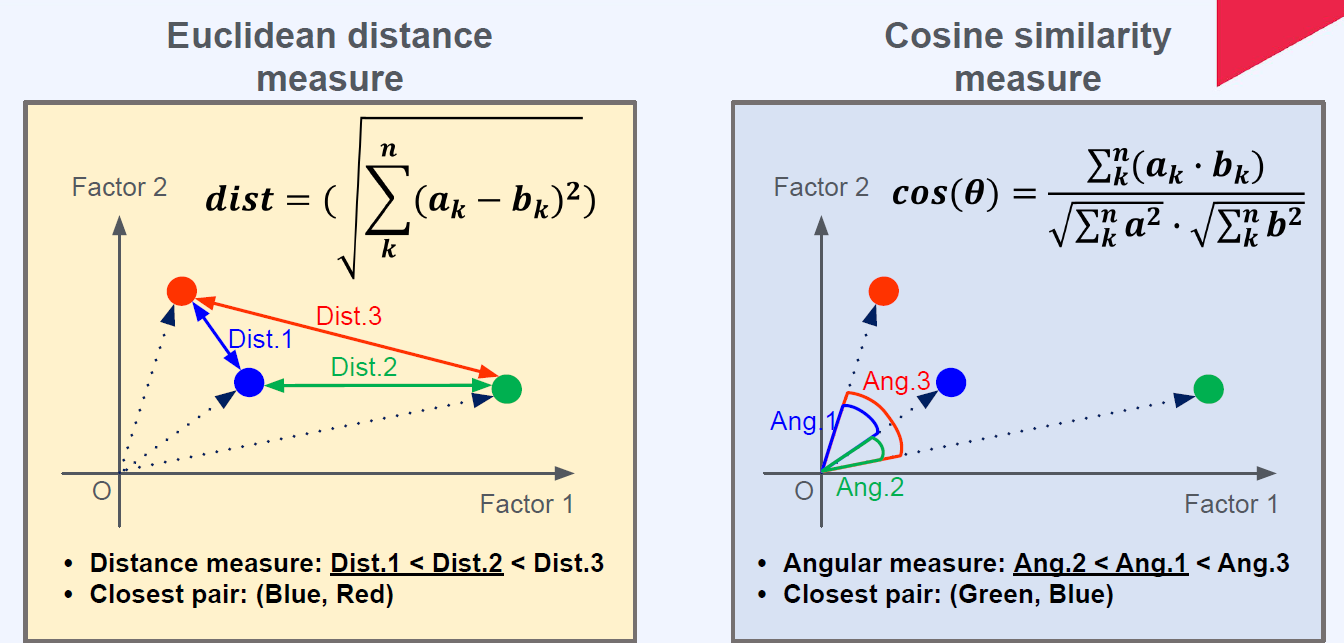

# Euclidean Distance

In [ ]:
def distance(x0,x1):
  x=x0-x1
  distance=np.sqrt(x@x)
  return distance

for문에서 첫번째는 비교할 이미지 그리고 두번째는 비교 대상의 이미지입니다.

In [ ]:
distances=[]
for i in range(len(images[:300])):
  for j in range(len(images[:300])):
    distances.append(distance(images[i],images[j]))

In [ ]:
len(distances)

90000

먼저 Euclidian Distance를 통해서 확인해봅니다.   
첫번째 이미지와 두번째 이미지간의 Euclidian Distance 값을 확인해볼수 있으며 히스토그램 또한 역시 함게 확인하실 수 있습니다.  
당연히 같은 index 이미지는 Euclidian Distance 값이 0이 되게 됩니다.

In [ ]:
@interact(first=(0,299),second=(0,299))
def show_distance_img(first,second):
  plt.figure(figsize=(8,4))
  f=images[first].reshape(28,28)
  s=images[second].reshape(28,28)

  ax0=plt.subplot2grid((2,2),(0,0))
  ax1=plt.subplot2grid((2,2),(1,0))
  ax2=plt.subplot2grid((2,2),(0,1),rowspan=2)

  ax0.imshow(f,cmap='gray')
  ax1.imshow(s,cmap='gray')
  ax2.hist(np.array(distances),bins=50)
  d=distance(f.ravel(),s.ravel()) #실제 이미지의 거리를 계산해서 어디에 distance가 보이는지를 보여줄 것이다.
  ax2.axvline(x=d,ymin=0,ymax=40000,color='C1',linewidth=4)
  ax2.text(0,16000,f"Distance is {d:.2f}",size=12)
  ax2.set(xlabel='distance',ylabel='num of images')

interactive(children=(IntSlider(value=149, description='first', max=299), IntSlider(value=149, description='se…

다음은 Cosine Similarity를 통해 확인합니다. 

In [ ]:
def angle(x0,x1):
  nominator=x0@x1 # 분자
  denominator=np.sqrt((x0@x0)*(x1@x1))
  angle=np.arccos(nominator/denominator)#arc을통해서 각도를 구해준다. 
  return angle

In [ ]:
angles =[]
for i in range(len(images[:300])):
  for j in range(len(images[:300])):
    angles.append(angle(images[i],images[j]))

In [ ]:
len(angles)

90000

In [ ]:
@interact(first=(0,299),second=(0,299))
def show_distance_img(first,second):
  plt.figure(figsize=(8,4))
  f=images[first].reshape(28,28)
  s=images[second].reshape(28,28)

  ax0=plt.subplot2grid((2,2),(0,0))
  ax1=plt.subplot2grid((2,2),(1,0))
  ax2=plt.subplot2grid((2,2),(0,1),rowspan=2)

  ax0.imshow(f,cmap='gray')
  ax1.imshow(s,cmap='gray')
  ax2.hist(np.array(angles),bins=50)
  ang=angle(f.ravel(),s.ravel()) #실제 이미지의 거리를 계산해서 어디에 distance가 보이는지를 보여줄 것이다.
  ax2.axvline(x=ang,ymin=0,ymax=40000,color='C1',linewidth=4)
  ax2.text(0,16000,f"Angle is {ang:.2f}",size=12)
  ax2.set(xlabel='distance',ylabel='num of images')
  plt.show()

interactive(children=(IntSlider(value=149, description='first', max=299), IntSlider(value=149, description='se…

# 가장 유사한 후보이미지 추출하기

In [ ]:
def most_similar_dist_image(index):
  distances=np.zeros((300))
  for i in range(300):
    distances[i]=distance(images[index],images[i])#비교할이미지, 비교당할2번째 이미지
  most_similar_index=np.where(distances==sorted(distances)[1])[0]#본인자신은 0번이니 그 다음 가까운이미지 index를 반환한다.
  return most_similar_index

distance 거리가 가장 가까운 이미지  
실습을 진행해보면 꽤나 높은 정확도로 가장 유사한 이미지를 추출함을 알 수 있습니다.

In [ ]:
@interact(index=(0,299))
def show_most_similar_distance(index=0):
  plt.figure(figsize=(6,4))
  f=images[index].reshape(28,28)
  most_similar_index=most_similar_dist_image(index)[0]
  s=images[most_similar_index].reshape(28,28)

  ax0=plt.subplot(121)
  ax1=plt.subplot(122)
  ax0.imshow(f,cmap='gray')
  ax0.set_title(f"original:{index}")
  ax1.imshow(s,cmap='gray')
  ax1.set_title(f"most similar:{most_similar_index}")
  


interactive(children=(IntSlider(value=0, description='index', max=299), Output()), _dom_classes=('widget-inter…

In [ ]:
def most_similar_angle_image(index):
  angles=np.zeros((300))
  for i in range(300):
    angles[i]=angle(images[index],images[i])
  most_similar_index=np.where(angles==sorted(angles)[1])[0]
  return most_similar_index


In [ ]:
@interact(index=(0,299))
def show_most_similar_angle(index=0):
  plt.figure(figsize=(6,4))
  f=images[index].reshape(28,28)
  most_similar_index=most_similar_angle_image(index)[0]#가장 유사한 인덱스값을 뽑고
  s=images[most_similar_index].reshape(28,28)#두번째 추출할이미지를 뽑는다.

  ax0=plt.subplot(121)
  ax1=plt.subplot(122)
  ax0.imshow(f,cmap='gray')
  ax0.set_title(f"original:{index}")
  ax1.imshow(s,cmap='gray')
  ax1.set_title(f"most similar:{most_similar_index}")
  


interactive(children=(IntSlider(value=0, description='index', max=299), Output()), _dom_classes=('widget-inter…

# 결론

유사도를 비교할때 euclidean을 할지 cosine similarity로할때 결과가 다르니 데이터에 따라 잘 선택해야합니다.

따라서 손글씨 숫자이미지로 비교를 해보았는데, 각 방법에 대한 결과값을 비교했습니다.
결과값은 차이가있지만 두 기법 모두 꽤 유사하게 일치함을 볼 수 있습니다.